# Evaluating Home Field Advantage During the 2018 Regular Season

## Import packages and config

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import mysql.connector
import config
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

## Connect to database

In [2]:
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    password = config.password,
    database = 'sports'
)
cursor = cnx.cursor(buffered=True)

## Define Functions

In [3]:
# Creates the 'home_pt_diff' column
def home_pt_diff(df):
    df['home_pt_diff'] = df['home_team_score'] - df['away_team_score']
    return df['home_pt_diff']

# Returns a list of the actual home_pt_diffs per game
def get_Actuals(df):
    actuals = [df.iloc[i] for i in range(df.shape[0])]
    return actuals

# Returns a list of z-scores
def get_Zscores(df):
    mu = df.mean()
    sigma = df.std()
    z_scores = [(df.iloc[i]-mu)/sigma for i in range(df.shape[0])]
    return z_scores

# Runs a t-test on data with popmean=mu and alpha = a
def run_ttest(data, mu, a):
    
    #calculate parameters
    n = len(data)
    s = np.std(data)
    x_bar = np.mean(data)
    std_err = s/np.sqrt(n)
    t = (x_bar-mu)/std_err
    t_crit = stats.t.ppf(1-a, df=n-1)
    
    #print results of test
    if (t>t_crit):
        print (f'Null hypothesis rejected. Results are statistically significant since t-value: {round(t,3)} > critical t-value: {round(t_crit,3)}')
    else:
        print (f'Null hypothesis not rejected. Results are not statistically significant with t-value: {round(t,3)} < critical t-value: {round(t_crit,3)}')

# # Returns a list of list. Each list in the list is a sample of size 'size'. The length of the list of lists is 'r'
# def create_Samples(data_list, size, r):
#     samples = [np.random.choice(data_list, replace=False, size=size) for i in range(r)]
#     return samples

# # Returns a list of sample means
# def get_SampleMeans(random_sample):
#     sample_means = [np.mean(i) for i in random_sample]
#     return sample_means

# # Returns a list of graph data
# def generate_graph_data(df):
#     graph_data = []
#     actual_data = get_Actuals(df)
#     z_scores = get_Zscores(df)
#     actual_data_samples = create_Samples(actual_data)
#     actual_data_sample_means = get_SampleMeans(actual_data_samples)
#     graph_data.append([actual_data, z_scores, actual_data_samples, actual_data_sample_means])
#     return graph_data

## Football

Query MySQL for data and create dataframes

In [4]:
cursor.execute("""
SELECT
    game_id,
    month,
    away_team,
    away_team_score,
    home_team,
    home_team_score
FROM
    sports.nfl
;
""")

nfl_data = cursor.fetchall()

columns = [
    'game_id',
    'month',
    'away_team',
    'away_team_score',
    'home_team',
    'home_team_score',
]

nfl_df = pd.DataFrame(nfl_data,columns=columns).set_index('game_id')


nfl_df['home_pt_diff'] = 0 # create dummy values for a new column
nfl_df['home_pt_diff'] = nfl_df.apply(home_pt_diff, axis=1) #apply the home_pt_function to the new column
nfl_df['home_pt_diff'].describe()

count    256.000000
mean       3.531250
std       22.428776
min      -59.000000
25%      -10.250000
50%        5.000000
75%       16.000000
max       67.000000
Name: home_pt_diff, dtype: float64

For "Actual Data": get data, get random samples, and get a list of samples means of the random sample

In [5]:
# get a list of actual point differential data
nfl_actuals = get_Actuals(nfl_df['home_pt_diff'])

# #generate a list of random sampling from the actual data
# nfl_actuals_samples = create_Samples(nfl_actuals, 50, 10**2)

# #generate a list of sample means for the random samples
# nfl_actuals_sample_means = get_SampleMeans(nfl_actuals_samples)

For "Standardized Data": get data, get random samples, and get a list of samples means of the random sample

In [6]:
# get a list of standardized point differential data
nfl_zscores = get_Zscores(nfl_df['home_pt_diff'])

# #generate a list of random sampling from the standardized data
# nfl_zscores_samples = create_Samples(nfl_zscores, 50, 10**2)

# #generate a list of sample means for the random samples
# nfl_zscores_sample_means = get_SampleMeans(nfl_zscores_samples)

## Hockey

Query MySQL for data and create dataframes

In [7]:
cursor.execute("""
SELECT
    game_id,
    month,
    away_team,
    away_team_score,
    home_team,
    home_team_score
FROM
    sports.nhl
;
""")

nhl_data = cursor.fetchall()

columns = [
    'game_id',
    'month',
    'away_team',
    'away_team_score',
    'home_team',
    'home_team_score',
]

nhl_df = pd.DataFrame(nhl_data,columns=columns).set_index('game_id')
nhl_df['home_pt_diff'] = 0
nhl_df['home_pt_diff'] = nhl_df.apply(home_pt_diff, axis=1)
nhl_df['home_pt_diff'].describe()

count    1271.000000
mean        0.405193
std         3.424590
min       -10.000000
25%        -2.000000
50%         1.000000
75%         3.000000
max         9.000000
Name: home_pt_diff, dtype: float64

For "Actual Data": get data, get random samples, and get a list of samples means of the random sample

In [8]:
# get a list of actual point differential data
nhl_actuals = get_Actuals(nhl_df['home_pt_diff'])

# #generate a list of random sampling from the actual data
# nhl_actuals_samples = create_Samples(nhl_actuals, 50, 10**2)

# #generate a list of sample means for the random samples
# nhl_actuals_sample_means = get_SampleMeans(nhl_actuals_samples)

For "Standardized Data": get data, get random samples, and get a list of samples means of the random sample

In [9]:
# get a list of standardized point differential data
nhl_zscores = get_Zscores(nhl_df['home_pt_diff'])

# #generate a list of random sampling from the standardized data
# nhl_zscores_samples = create_Samples(nhl_zscores, 50, 10**2)

# #generate a list of sample means for the random samples
# nhl_zscores_sample_means = get_SampleMeans(nhl_zscores_samples)

## Baseball

Query MySQL for data and create dataframes

In [10]:
cursor.execute("""
SELECT
    game_id,
    month,
    away_team,
    away_team_score,
    home_team,
    home_team_score
FROM
    sports.mlb
;
""")

mlb_data = cursor.fetchall()

columns = [
    'game_id',
    'month',
    'away_team',
    'away_team_score',
    'home_team',
    'home_team_score',
]

mlb_df = pd.DataFrame(mlb_data,columns=columns).set_index('game_id')
mlb_df['home_pt_diff'] = 0
mlb_df['home_pt_diff'] = mlb_df.apply(home_pt_diff, axis=1)
mlb_df['home_pt_diff'].describe()

count    2468.000000
mean        0.161669
std         7.291056
min       -32.000000
25%        -5.000000
50%         1.000000
75%         5.000000
max        31.000000
Name: home_pt_diff, dtype: float64

For "Actual Data": get data, get random samples, and get a list of samples means of the random sample

In [11]:
# get a list of actual point differential data
mlb_actuals = get_Actuals(mlb_df['home_pt_diff'])

# #generate a list of random sampling from the actual data
# mlb_actuals_samples = create_Samples(mlb_actuals, 50, 10**2)

# #generate a list of sample means for the random samples
# mlb_actuals_sample_means = get_SampleMeans(mlb_actuals_samples)

For "Standardized Data": get data, get random samples, and get a list of samples means of the random sample

In [12]:
# get a list of standardized point differential data
mlb_zscores = get_Zscores(mlb_df['home_pt_diff'])

# #generate a list of random sampling from the standardized data
# mlb_zscores_samples = create_Samples(mlb_zscores, 50, 10**2)

# #generate a list of sample means for the random samples
# mlb_zscores_sample_means = get_SampleMeans(mlb_zscores_samples)

## Basketball

In [13]:
cursor.execute("""
SELECT
    *
FROM
    sports.nba
;
""")

nba_data = cursor.fetchall()

columns = [
    'game_id',
    'month',
    'away_team',
    'away_team_score',
    'home_team',
    'home_team_score',
]

nba_df = pd.DataFrame(nba_data,columns=columns).set_index('game_id')
nba_df['home_pt_diff'] = 0
nba_df['home_pt_diff'] = nba_df.apply(home_pt_diff, axis=1)
nba_df['home_pt_diff'].describe()

count    1868.000000
mean        2.828158
std        14.498949
min       -56.000000
25%        -7.000000
50%         3.000000
75%        11.250000
max        58.000000
Name: home_pt_diff, dtype: float64

For "Actual Data": get data, get random samples, and get a list of samples means of the random sample

In [14]:
# get a list of actual point differential data
nba_actuals = get_Actuals(nba_df['home_pt_diff'])

# #generate a list of random sampling from the actual data
# nba_actuals_samples = create_Samples(nba_actuals, 50, 10**2)

# #generate a list of sample means for the random samples
# nba_actuals_sample_means = get_SampleMeans(nba_actuals_samples)

For "Standardized Data": get data, get random samples, and get a list of samples means of the random sample

In [15]:
# get a list of standardized point differential data
nba_zscores = get_Zscores(nba_df['home_pt_diff'])

# #generate a list of random sampling from the standardized data
# nba_zscores_samples = create_Samples(nba_zscores, 50, 10**2)

# #generate a list of sample means for the random samples
# nba_zscores_sample_means = get_SampleMeans(nba_zscores_samples)

## Generate Graphs

Graph 1: For internal use only. Meant to visiualize our data accross sports

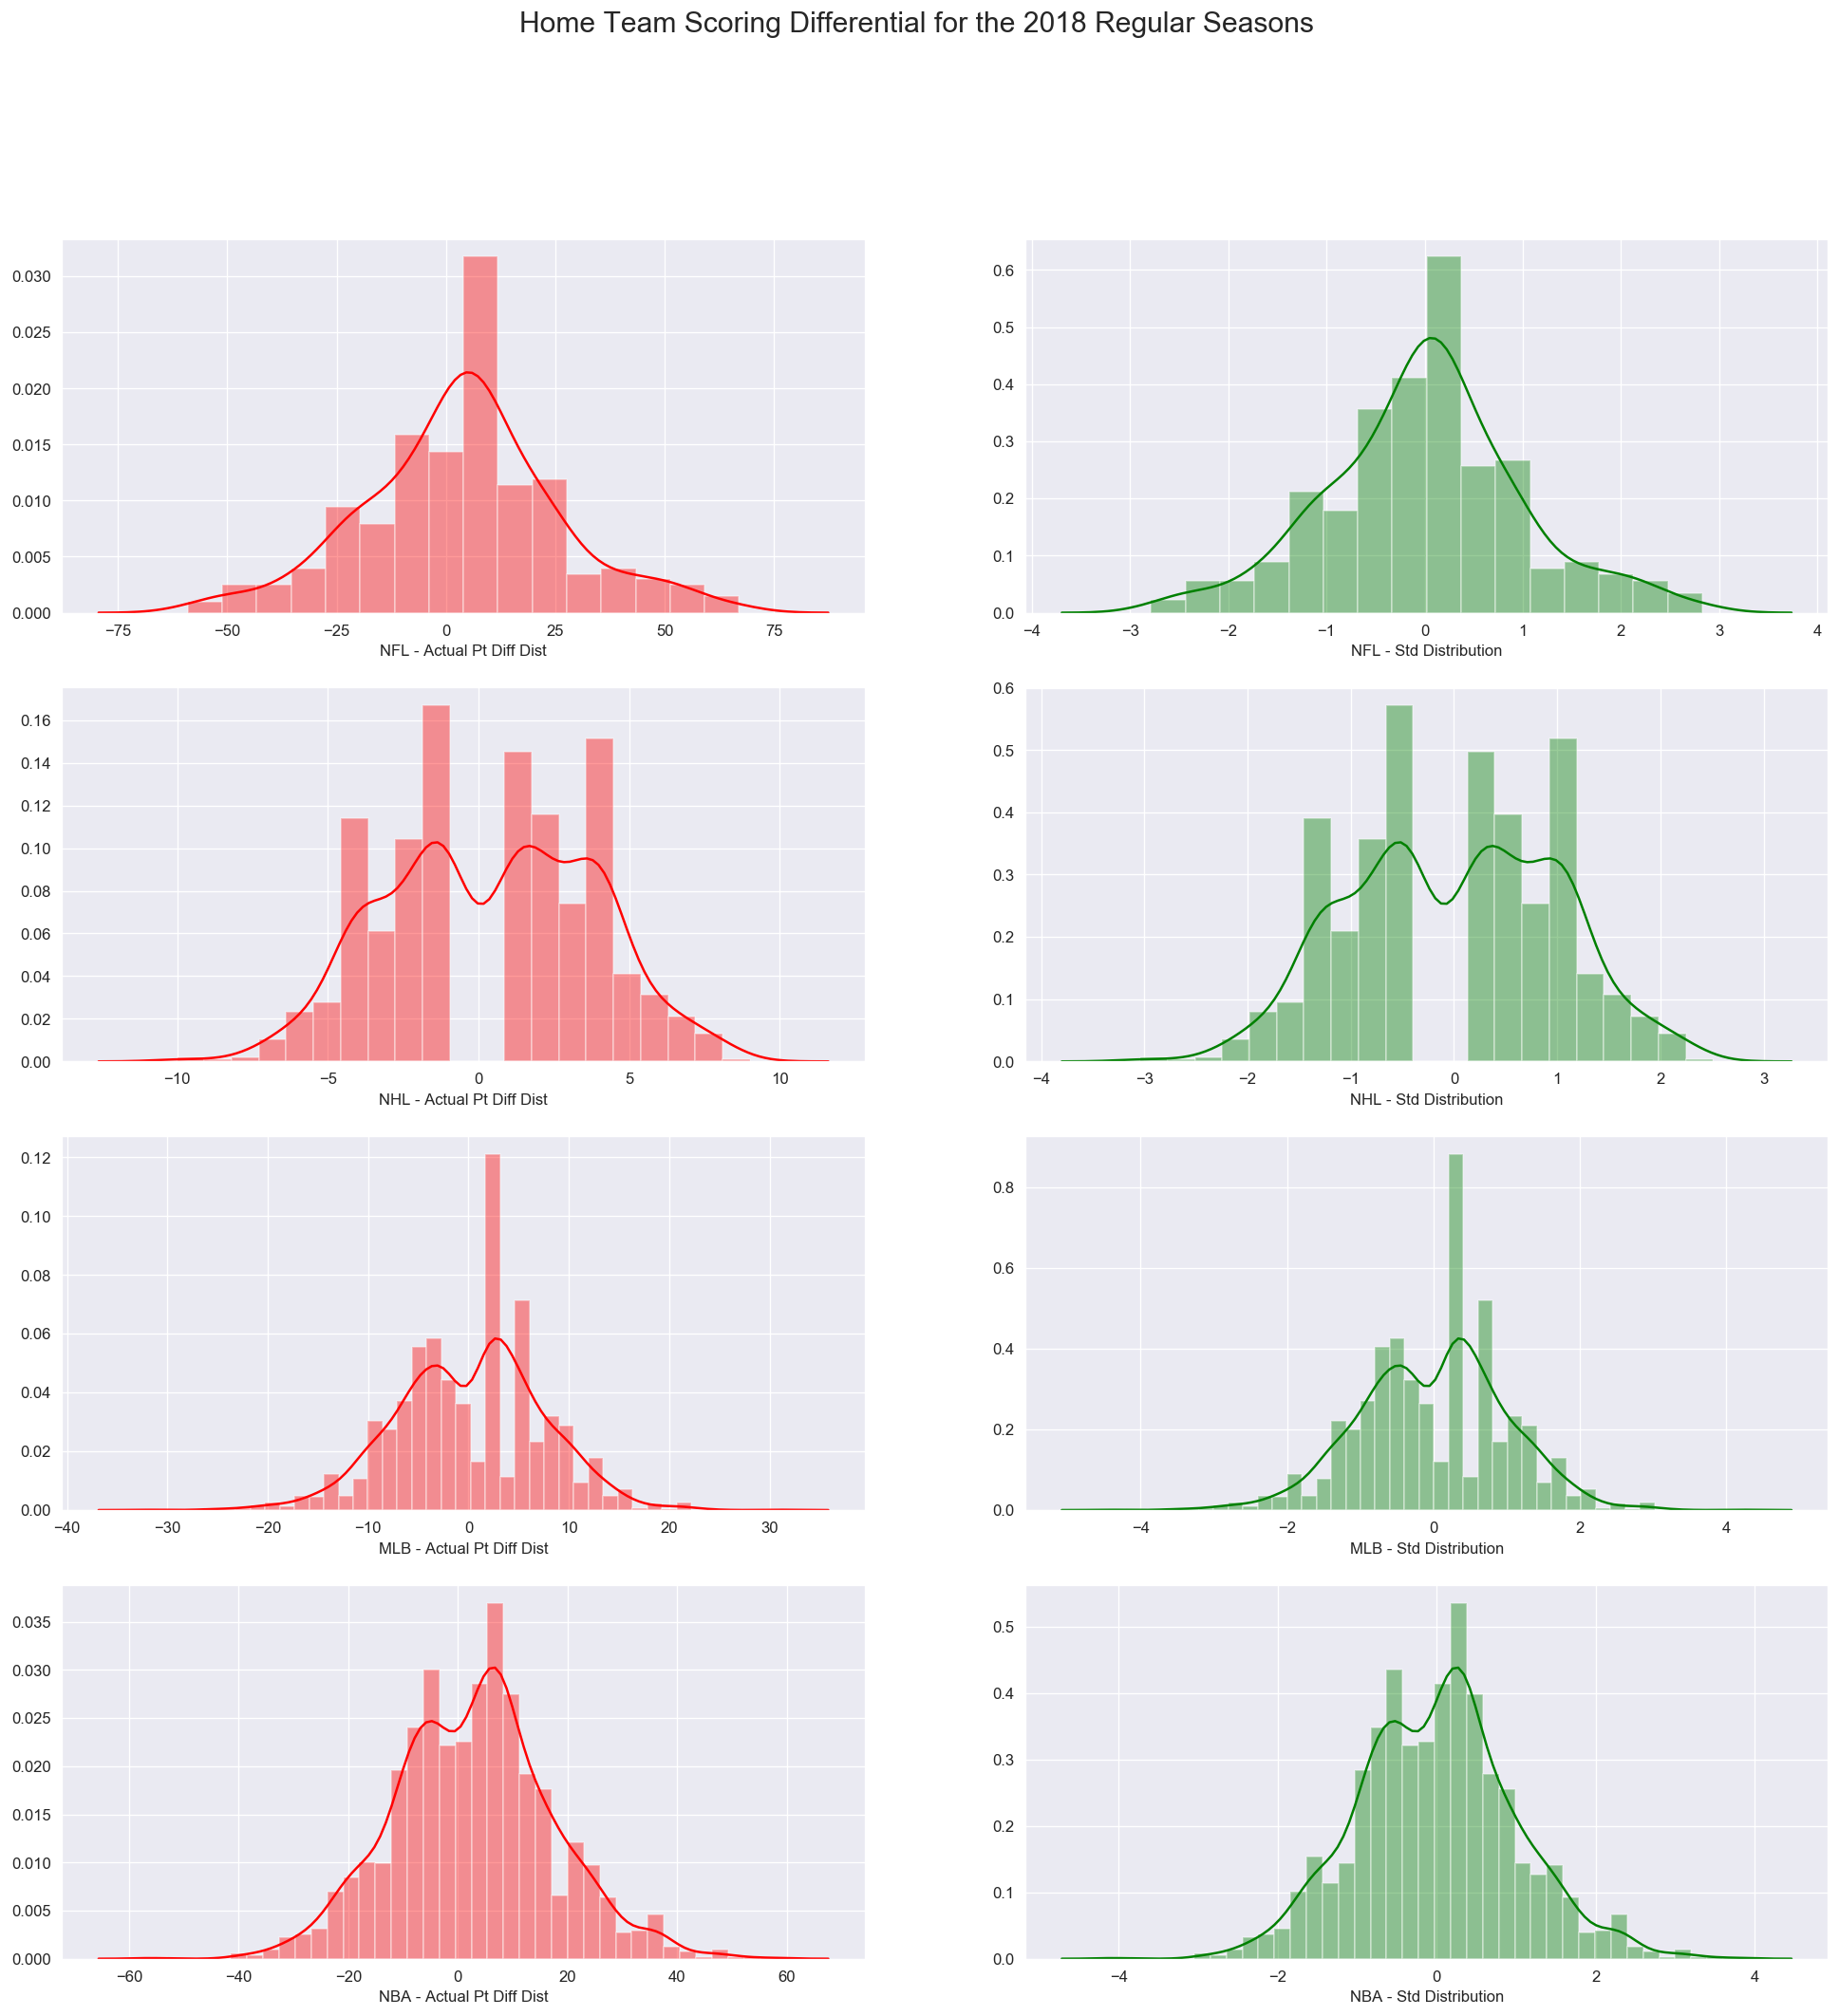

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20), sharex=False, sharey=False, dpi=120)
fig.suptitle('Home Team Scoring Differential for the 2018 Regular Seasons', fontsize=18)

#football: actual / actual_sample_means / standard / standard_sample_means
sns.distplot(nfl_actuals,
             bins='auto',
             color='r',
             ax=axes[0][0],
             axlabel = 'NFL - Actual Pt Diff Dist'
            );

# sns.distplot(nfl_actuals_sample_means,
#              bins='auto',
#              color='b',
#              ax=axes[0][1],
#              axlabel = 'NFL  - Act. Sample Means Distribution'
#             );

sns.distplot(nfl_zscores,
             bins='auto',
             color='g',
             ax=axes[0][1],
             axlabel = 'NFL - Std Distribution'
            );

# sns.distplot(nfl_zscores_sample_means,
#              bins='auto',
#              color='y',
#              ax=axes[0][3],
#              axlabel = 'NFL - Std. Sample Means Distribution'
#             );

#hockey: actual / actual_sample_means / standard / standard_sample_means
sns.distplot(nhl_actuals,
             bins='auto',
             color='r',
             ax=axes[1][0],
             axlabel = 'NHL - Actual Pt Diff Dist'
            );

# sns.distplot(nhl_actuals_sample_means,
#              bins='auto',
#              color='b',
#              ax=axes[1][1],
#              axlabel = 'NHL  - Act. Sample Means Distribution'
#             );

sns.distplot(nhl_zscores,
             bins='auto',
             color='g',
             ax=axes[1][1],
             axlabel = 'NHL - Std Distribution'
            );

# sns.distplot(nhl_zscores_sample_means,
#              bins='auto',
#              color='y',
#              ax=axes[1][3],
#              axlabel = 'NHL - Std. Sample Means Distribution'
#             );

#baseball: actual / actual_sample_means / standard / standard_sample_means
sns.distplot(mlb_actuals,
             bins='auto',
             color='r',
             ax=axes[2][0],
             axlabel = 'MLB - Actual Pt Diff Dist'
            );

# sns.distplot(mlb_actuals_sample_means,
#              bins='auto',
#              color='b',
#              ax=axes[2][1],
#              axlabel = 'MLB  - Act. Sample Means Distribution'
#             );

sns.distplot(mlb_zscores,
             bins='auto',
             color='g',
             ax=axes[2][1],
             axlabel = 'MLB - Std Distribution'
            );

# sns.distplot(mlb_zscores_sample_means,
#              bins='auto',
#              color='y',
#              ax=axes[2][3],
#              axlabel = 'MLB - Std. Sample Means Distribution'
#             );

#basketball: actual / actual_sample_means / standard / standard_sample_means
sns.distplot(nba_actuals,
             bins='auto',
             color='r',
             ax=axes[3][0],
             axlabel = 'NBA - Actual Pt Diff Dist'
            );

# sns.distplot(nba_actuals_sample_means,
#              bins='auto',
#              color='b',
#              ax=axes[3][1],
#              axlabel = 'NBA  - Act. Sample Means Distribution'
#             );

sns.distplot(nba_zscores,
             bins='auto',
             color='g',
             ax=axes[3][1],
             axlabel = 'NBA - Std Distribution'
            );

# sns.distplot(nba_zscores_sample_means,
#              bins='auto',
#              color='y',
#              ax=axes[3][3],
#              axlabel = 'NBA - Std. Sample Means Distribution'
#             );

Graph 2: Boxplot of the home team point differential

In [17]:
# create a list of dictionaries for the sports data
sports_dict = [
    {'sample' : 'Football',
     'data' : nfl_actuals
    },
    {'sample' : 'Hockey',
     'data' : nhl_actuals
    },
    {'sample' : 'Baseball',
     'data' : mlb_actuals
    },
    {'sample' : 'Basketball',
     'data' : nba_actuals
    }
]

#create a list of x values and y values for boxplot
boxplot_x = []
boxplot_y = []
for sport in sports_dict:
    for i in range(len(sport['data'])):
        boxplot_x.append(sport['sample'])
        boxplot_y.append(sport['data'][i])

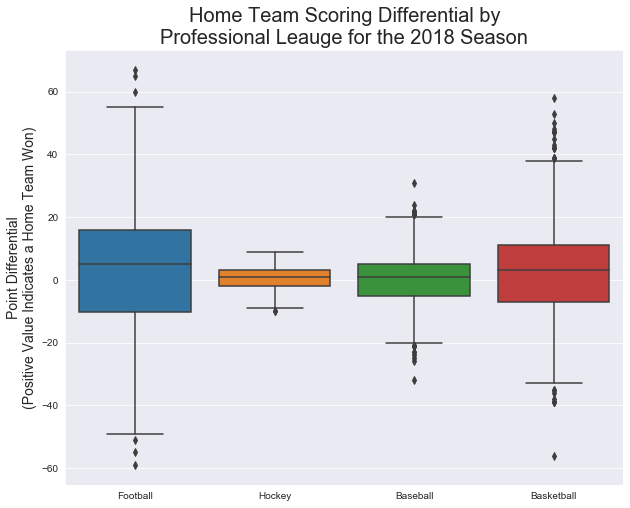

In [18]:
fig2 = plt.figure(figsize=(10,8))
ax2 = fig2.add_subplot(111)
sns.boxplot(x=boxplot_x, y=boxplot_y, ax=ax2);
ax2.set_title('Home Team Scoring Differential by\nProfessional Leauge for the 2018 Season', {'fontsize' : 20});
ax2.set_ylabel('Point Differential\n(Positive Value Indicates a Home Team Won)', {'fontsize' : 14});

# Question 1: Is there home field advantage in any of the four major sports?

Hypothesis

$H_0: \bar x_i$  is less than or equal to 0

$H_1: \bar x_i$  is greater than  0

where $\bar x_i$ = the sample mean of each sport's home team point differential

Run one tailed t-tests to test alternative hypothesis. A t-test is performed since we do not have the population variance. Reject $H_0$ if t > $t_c$

In [19]:
"""
    Run t-test on NFL home point differential data to determine if there is statistical evidence that
    x_bar is greater than 0 (i.e., there exists a home field advantage)
"""

run_ttest(nfl_actuals, 0, 0.05)

Null hypothesis rejected. Results are statistically significant since t-value: 2.524 > critical t-value: 1.651


In [20]:
"""
    Run t-test on NHL home point differential data to determine if there is statistical evidence that
    x_bar is greater than 0 (i.e., there exists a home field advantage)
"""

run_ttest(nhl_actuals, 0, 0.05)

Null hypothesis rejected. Results are statistically significant since t-value: 4.22 > critical t-value: 1.646


In [21]:
"""
    Run t-test on NHL home point differential data to determine if there is statistical evidence that
    x_bar is greater than 0 (i.e., there exists a home field advantage)
"""

run_ttest(mlb_actuals, 0, 0.05)

Null hypothesis not rejected. Results are not statistically significant with t-value: 1.102 < critical t-value: 1.645


In [22]:
"""
    Run t-test on NHL home point differential data to determine if there is statistical evidence that
    x_bar is greater than 0 (i.e., there exists a home field advantage)
"""

run_ttest(nba_actuals, 0, 0.05)

Null hypothesis rejected. Results are statistically significant since t-value: 8.433 > critical t-value: 1.646


## The Results

Using the 2018 regular season as a sample for all games played in league history, there exists stastical evidence of home field advantage in three of the four major professional sport leagues (Football, Hockey, and Basketball), while there exists no statistical evidence of a home field advantage in Baseball.

In [23]:
cursor.close()
cnx.close()